In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [22]:
# Import Data
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")
fake['isfake'] = 1
true['isfake'] = 0
news = pd.concat([true,fake]).reset_index(drop = True)
news.drop(columns = ['date'], inplace = True)
news['original'] = news['title'] + ' ' + news['text']

In [113]:
fake['text'][0]

'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [31]:
# Data Cleaning by removing stopwords
nltk.download("stopwords")
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jo4ev\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [34]:
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
            result.append(token)
            
    return result

In [40]:
news['clean'] = news['original'].apply(preprocess)
news['clean_joined'] = news['clean'].apply(lambda x: " ".join(x))

In [84]:
news['original'][0]

'As U.S. budget fight looms, Republicans flip their fiscal script WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non

In [83]:
news['clean_joined'][0]

'budget fight looms republicans flip fiscal script washington reuters head conservative republican faction congress voted month huge expansion national debt cuts called fiscal conservative sunday urged budget restraint keeping sharp pivot republicans representative mark meadows speaking face nation drew hard line federal spending lawmakers bracing battle january return holidays wednesday lawmakers begin trying pass federal budget fight likely linked issues immigration policy november congressional election campaigns approach republicans seek control congress president donald trump republicans want budget increase military spending democrats want proportional increases defense discretionary spending programs support education scientific research infrastructure public health environmental protection trump administration willing going increase defense discretionary spending percent meadows chairman small influential house freedom caucus said program democrats saying need government raise 

<AxesSubplot:xlabel='count', ylabel='isfake'>

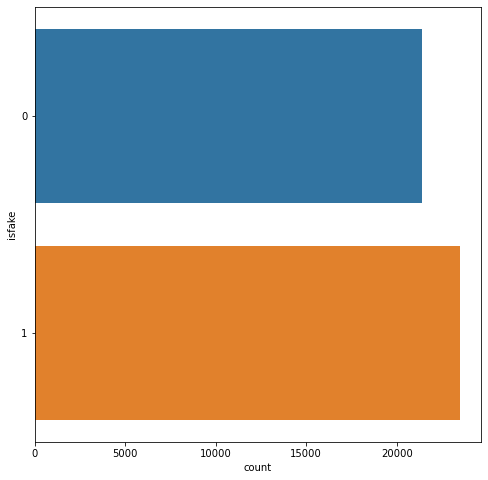

In [47]:
# Visualization and Cleanup
plt.figure(figsize = (8, 8))
sns.countplot(y = "isfake", data = news)

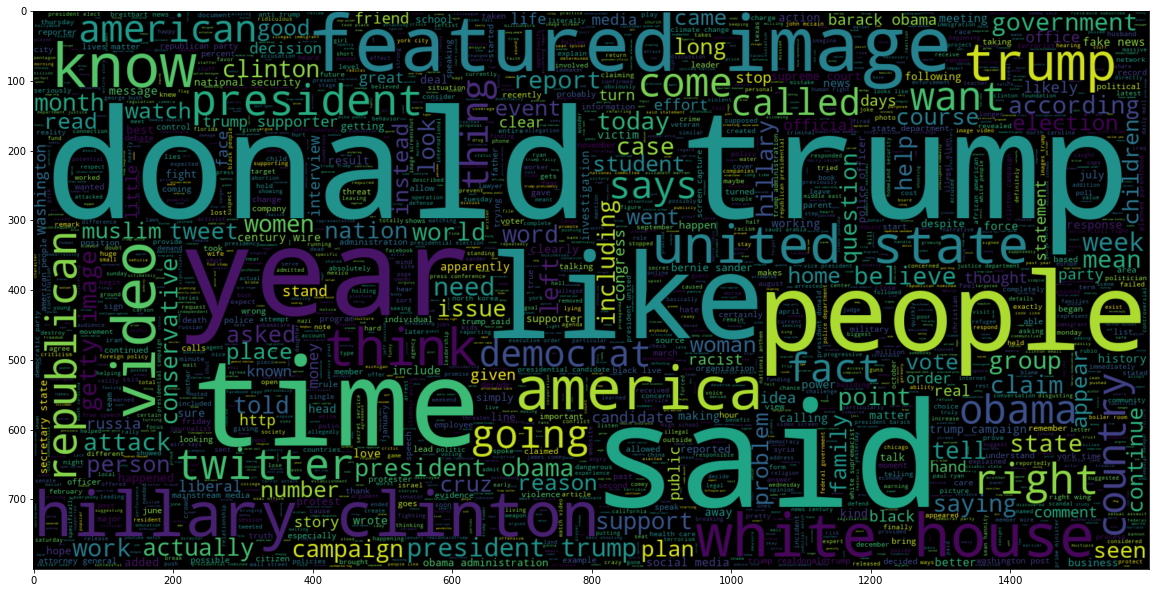

In [48]:
# Plot word from true news
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = stop_words).generate(" ".join(news[news.isfake == 1].clean_joined))
plt.imshow(wc, interpolation = 'bilinear')

In [49]:
# length of maximum document will be needed to create word embeddings 
maxlen = -1
for doc in news.clean_joined:
    tokens = nltk.word_tokenize(doc)
    if(maxlen<len(tokens)):
        maxlen = len(tokens)
print("The maximum number of words in any document is =", maxlen)

The maximum number of words in any document is = 4405


In [52]:
# Prepare for Machine Learning by Tokenization

# split data into test and train 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(news.clean_joined, news.isfake, test_size = 0.2)

In [56]:
list_of_words = []
for i in news.clean:
    for j in i:
        list_of_words.append(j)
total_words = len(list(set(list_of_words)))
total_words

108704

In [57]:
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(x_train)
train_sequences = tokenizer.texts_to_sequences(x_train)
test_sequences = tokenizer.texts_to_sequences(x_test)

In [91]:
test_sequences[3]

[6644,
 148,
 4181,
 46,
 421,
 22,
 344,
 231,
 5860,
 9,
 6644,
 148,
 104,
 6359,
 4181,
 2,
 93,
 1140,
 23,
 298,
 411,
 344,
 231,
 1598,
 259,
 605,
 37,
 528,
 23,
 146,
 50,
 2100,
 20,
 41,
 49,
 4181,
 23,
 553,
 225,
 9749,
 344,
 1376,
 1861,
 173,
 454,
 795,
 3774,
 11,
 501,
 1472,
 162,
 75,
 528,
 23,
 488,
 70,
 411,
 994,
 4028,
 369,
 521,
 146,
 4181,
 17,
 201,
 115,
 3,
 3114,
 19804,
 259,
 1108,
 1050,
 344,
 231,
 218,
 871,
 243,
 18,
 719,
 18898,
 163,
 411,
 994,
 202,
 5210,
 6403,
 243]

In [58]:
padded_train = pad_sequences(train_sequences,maxlen = 40, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences,maxlen = 40, truncating = 'post') 

In [92]:
padded_test[4]

array([   97,  2762,     1,  1098,   326,  1701,  3511,    25,     9,
           3,    10,     1,   488,   138,   534,   326,   638,   244,
          91,  3677,   270,  1752,  8227,   502,  3677,     2,    67,
          83, 12733, 13454,     1,  1098,   804,   372,   113,   326,
         532,    15,     8,    57])

In [59]:
# Create Machine Learning Model

# Sequential Model
model = Sequential()

# embeddidng layer
model.add(Embedding(total_words, output_dim = 128))
# model.add(Embedding(total_words, output_dim = 240))


# Bi-Directional RNN and LSTM
model.add(Bidirectional(LSTM(128)))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dense(1,activation= 'sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         13914112  
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               263168    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 14,210,305
Trainable params: 14,210,305
Non-trainable params: 0
_________________________________________________________________


In [60]:
y_train = np.asarray(y_train)

In [61]:
# train the model
model.fit(padded_train, y_train, batch_size = 64, validation_split = 0.1, epochs = 3)

Epoch 1/3
506/506 [==============================] - 125s 247ms/step - loss: 0.0427 - acc: 0.9860 - val_loss: 0.0077 - val_acc: 0.9989
Epoch 2/3
506/506 [==============================] - 125s 247ms/step - loss: 0.0017 - acc: 0.9997 - val_loss: 0.0075 - val_acc: 0.9989
Epoch 3/3
506/506 [==============================] - 127s 250ms/step - loss: 0.0026 - acc: 0.9994 - val_loss: 0.0067 - val_acc: 0.9989


In [62]:
pred = model.predict(padded_test)

In [106]:
padded_test

array([[  57, 1026, 1564, ..., 1897,    2,   52],
       [  38, 1102, 4587, ..., 4258,   49, 3537],
       [   1, 5486,    6, ..., 1065, 4212, 1719],
       ...,
       [ 397,  948, 9367, ...,   49,  397,    2],
       [ 688,  719, 2014, ..., 2570,  164,  131],
       [  13, 6027,  728, ...,   41,   49,   71]])

In [96]:
padpred = model.predict(padded_test[4])

In [103]:
pred

array([[3.4297555e-05],
       [2.1849473e-05],
       [2.0828843e-04],
       ...,
       [3.5227382e-05],
       [9.5466939e-06],
       [3.3074604e-05]], dtype=float32)

In [95]:
len(pred)

8980

In [63]:
# Set threshold to 0.5
prediction = []
for i in range(len(pred)):
    if pred[i].item() > 0.5:
        prediction.append(1)
    else:
        prediction.append(0)

In [108]:
print(prediction)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 

In [109]:
y_test

1638     0
2424     0
8112     0
16736    0
3688     0
        ..
37708    1
37051    1
7923     0
4226     0
4169     0
Name: isfake, Length: 8980, dtype: int64

In [64]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(list(y_test), prediction)

print("Model Accuracy : ", accuracy)

Model Accuracy :  0.9966592427616926


<AxesSubplot:>

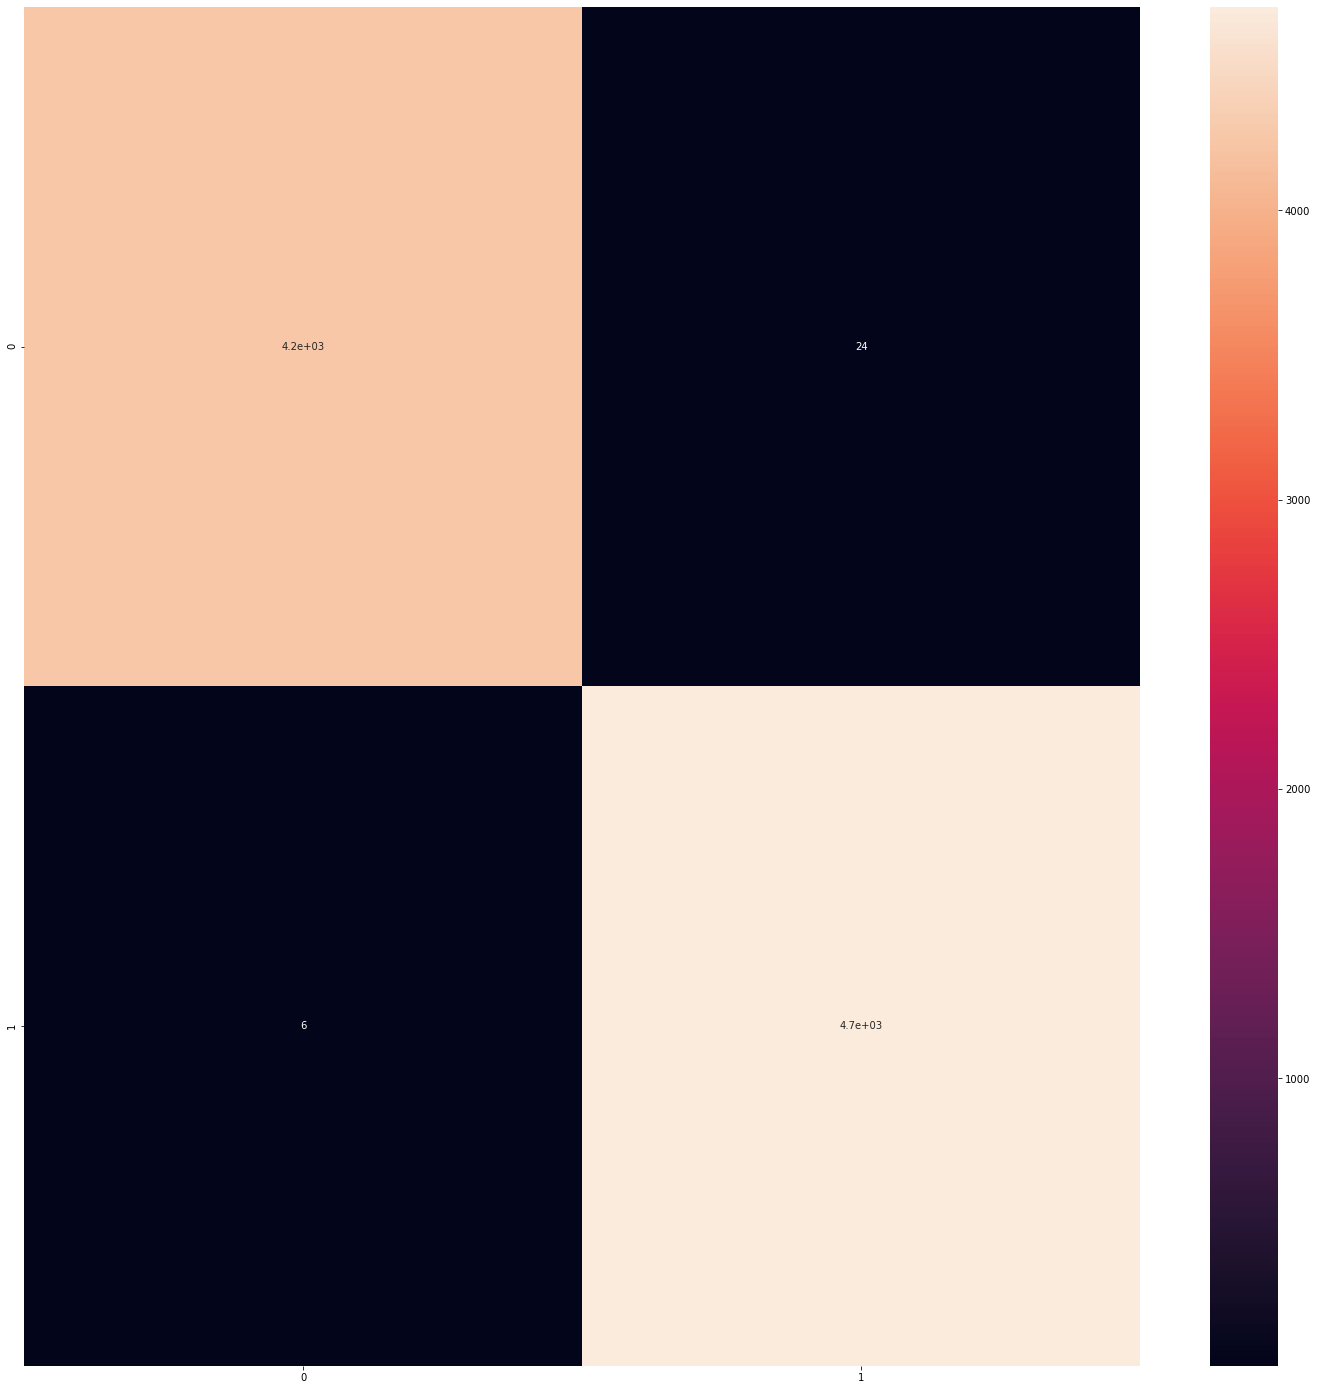

In [65]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(list(y_test), prediction)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

In [66]:
# category dict
category = { 0: 'Fake News', 1 : "Real News"}

In [107]:
model.save('trained_model2.h5')